In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import rawpy, imageio
import numpy as np
from skimage.exposure import rescale_intensity

In [2]:
#Loading image
raw = rawpy.imread('/home/user1/DSC_0011.NEF')
rgb = raw.postprocess(no_auto_bright=True,use_auto_wb =False,gamma=None)
bw=(0.21*rgb[:,:,0])+(0.72*rgb[:,:,0])+(0.07*rgb[:,:,0])
#Adding grainy noise (gaussian)
mean=0
sigma=1
row,col= bw.shape
fnoise = np.random.normal(mean,sigma,(row,col)) + bw
#Contrasting the image and expanding the levels
fnoise=fnoise-fnoise.min()
fnoise[fnoise<28]=0
fnoise=rescale_intensity(fnoise)
#Vignetting
xs = np.arange(row)
ys = np.arange(col)
distance_squared = (xs - row/2.0)[..., np.newaxis] ** 2 \
 + (ys - col/2.0) ** 2
sigma_squared = (row/2) ** 2 + (col/2) ** 2
falloff = np.exp(-distance_squared/sigma_squared)
vignette = fnoise * (falloff*1.5)
#Saving the image
#imageio.imwrite('/home/user1/final.jpg', vignette) 

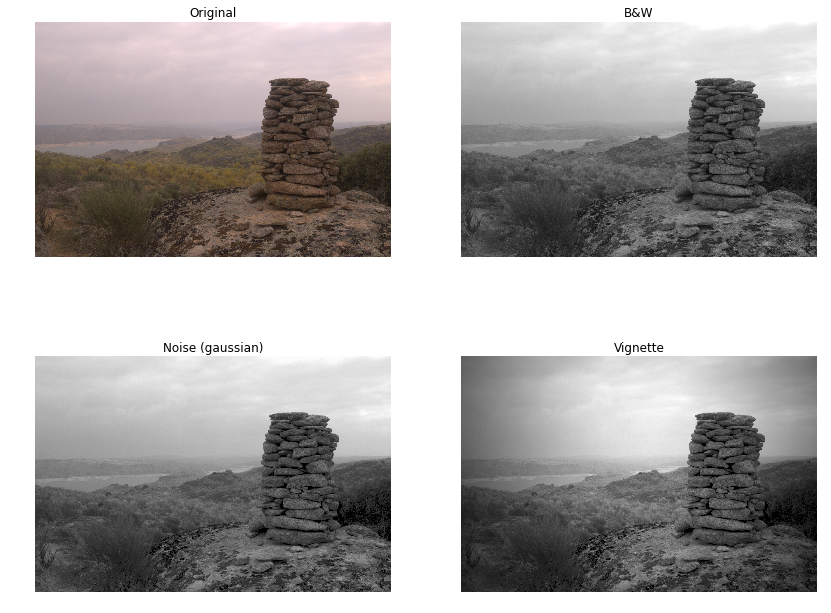

In [3]:
plt.figure(1,figsize=(14,11))
plt.subplot(221)
plt.axis('off')
plt.title('Original')
plt.imshow(rgb)
plt.subplot(222)
plt.axis('off')
plt.title('B&W')
plt.imshow(bw,cmap='gray')
plt.subplot(223)
plt.axis('off')
plt.title('Noise (gaussian)')
plt.imshow(fnoise,cmap='gray')
plt.subplot(224)
plt.axis('off')
plt.title('Vignette')
plt.imshow(vignette,cmap='gray')